## 7. Write a program to perform the forecasting using MA(q) model. Also, calculate and report the Root Mean Squared Error (RMSE) for the forecasts

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('AirPassengers.csv',index_col=0,parse_dates=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Time Series Analysis

In [3]:
# missing vale interpolation
data = data.assign(Passengers=data.Passengers.interpolate(method='linear'))

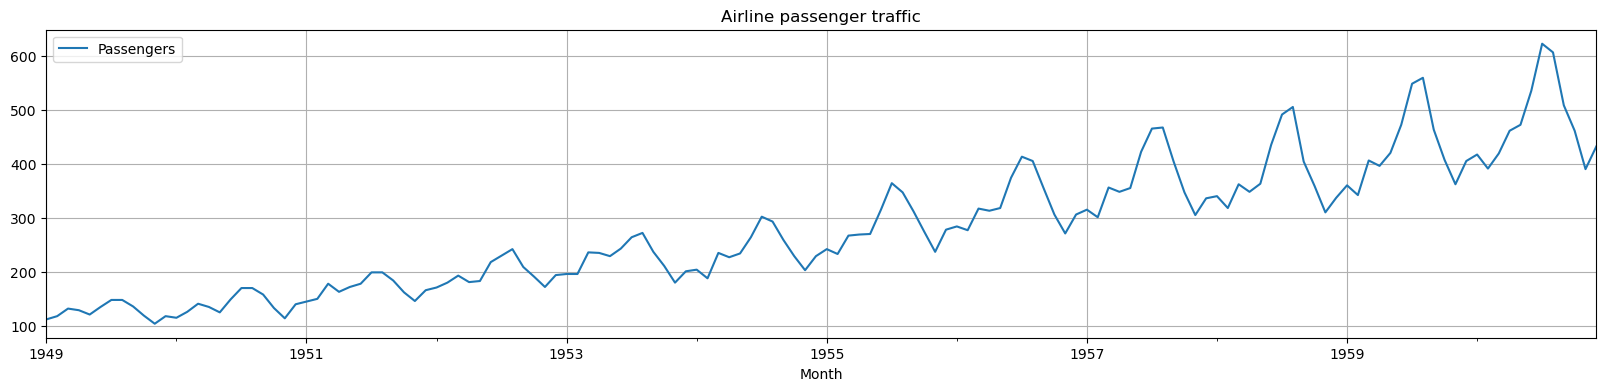

In [4]:
data[['Passengers']].plot(figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

In [5]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [6]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

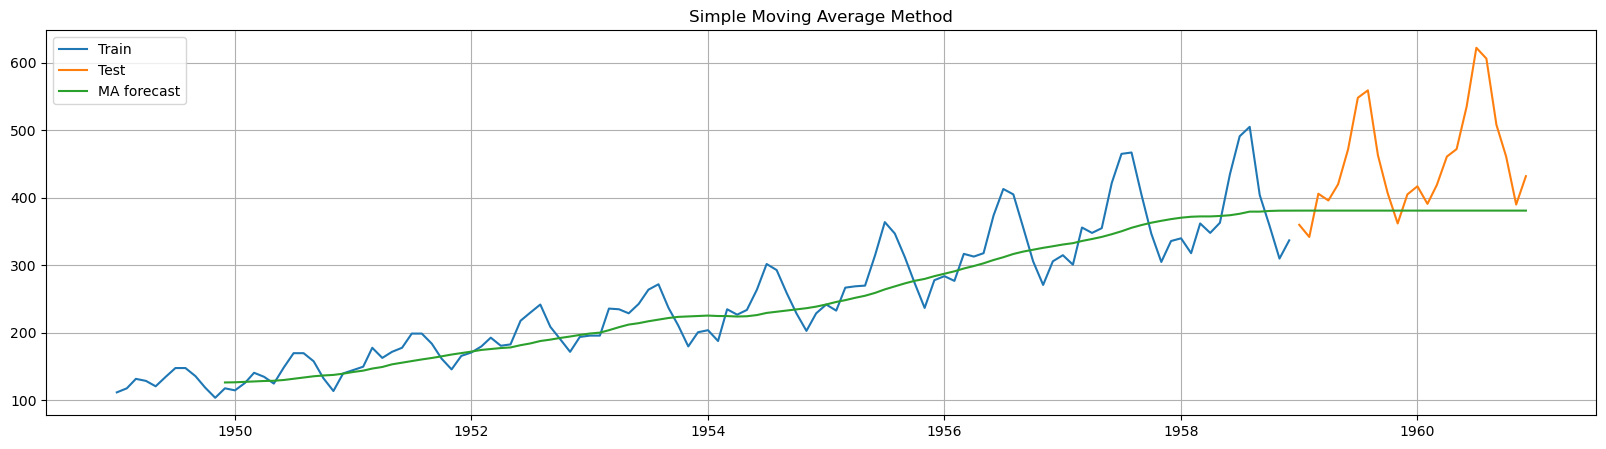

In [7]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='MA forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 103.21
